# Loading Data set 

In [1]:
import pandas as pd

In [2]:
#loading the dataset
big_mart_data=pd.read_csv("Train.csv")

In [3]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data exploration

In [4]:
#dataset informations
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# to know the null values
big_mart_data.isnull().sum() 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
#the shape of dataset
big_mart_data.shape

(8523, 12)

In [7]:
#unique values in dataset
big_mart_data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
#description of dataset
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Handling missing values

In [9]:
#replacing null values with median of that column
median_Item_Weight=big_mart_data["Item_Weight"].median()
big_mart_data["Item_Weight"].fillna(value=median_Item_Weight,inplace=True)

In [10]:
#Outlet_Size depends on Outlet_Type . So, we will replace it by the mode of Outlet_Size for each Outlet_Type
mode_of_Outlet_Size=big_mart_data.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x:x.mode()[0]))
missing_values=big_mart_data["Outlet_Size"].isnull()
big_mart_data.loc[missing_values,"Outlet_Size"]=big_mart_data.loc[missing_values,"Outlet_Type"].apply(lambda x:mode_of_Outlet_Size[x])


In [11]:
#Again checking for null values
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data visualization

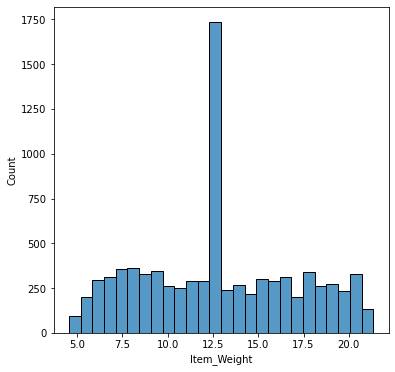

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
#Item_Weight distribution
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data["Item_Weight"])
plt.show()

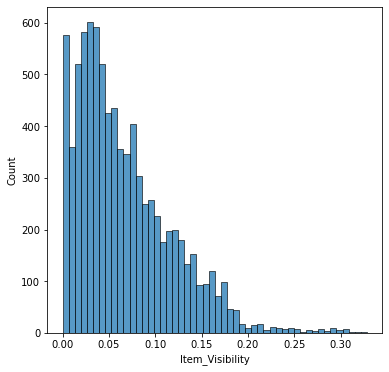

In [13]:
#Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data["Item_Visibility"])
plt.show()

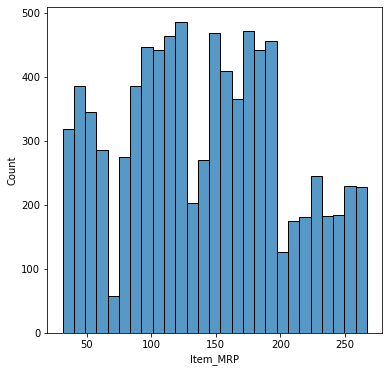

In [14]:
#Item_MRP distribution
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data["Item_MRP"])
plt.show()

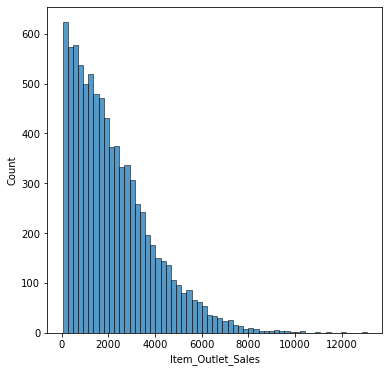

In [15]:
#Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data["Item_Outlet_Sales"])
plt.show()

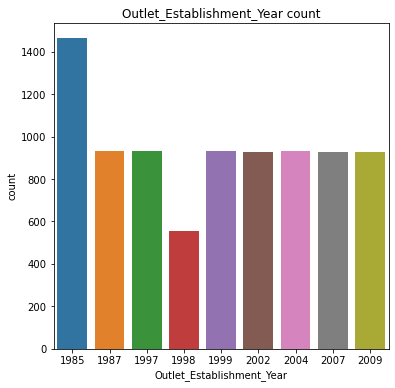

In [16]:
#Outlet_Establishment_Year count
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Establishment_Year",data=big_mart_data)
plt.title("Outlet_Establishment_Year count")
plt.show()

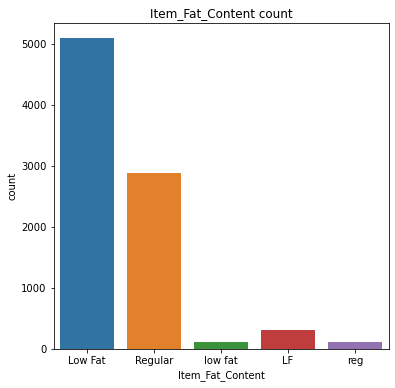

In [17]:
#Item_Fat_Content count
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content",data=big_mart_data)
plt.title("Item_Fat_Content count")
plt.show()

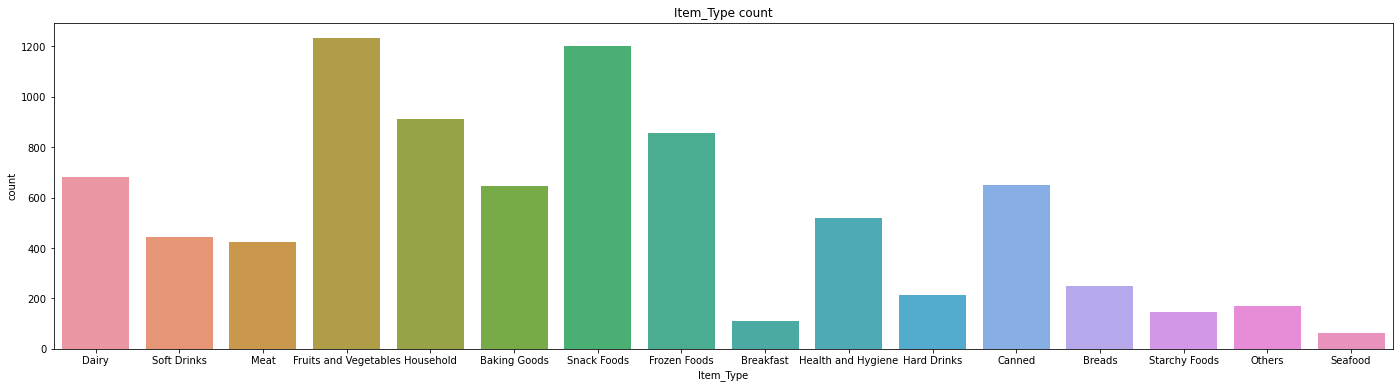

In [18]:
#Item_Type count
plt.figure(figsize=(24,6))
sns.countplot(x="Item_Type",data=big_mart_data)
plt.title("Item_Type count")
plt.show()

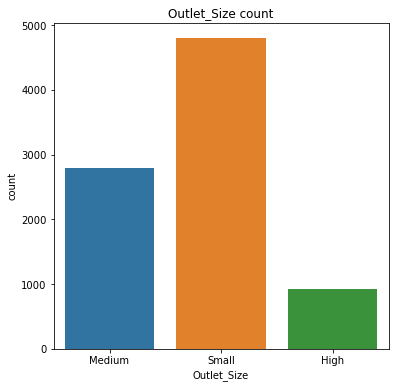

In [19]:
#Outlet_Size count
plt.figure(figsize=(6,6))
sns.countplot(x ="Outlet_Size",data=big_mart_data)
plt.title("Outlet_Size count")
plt.show()

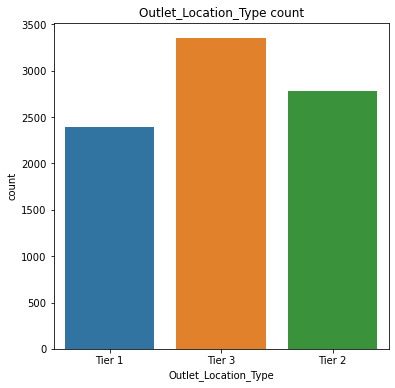

In [20]:
#Outlet_Location_Type count
plt.figure(figsize=(6,6))
sns.countplot(x ="Outlet_Location_Type",data=big_mart_data)
plt.title("Outlet_Location_Type count")
plt.show()

# Data preprocessing

In [21]:
sum(big_mart_data["Item_Visibility"]==0)

526

In [22]:
#practically, Item_Visibility cannot be zero. So, we are replacing the 0 values with the mean values of Item_Visibility
big_mart_data.loc[:,"Item_Visibility"].replace([0],[big_mart_data["Item_Visibility"].mean()],inplace=True)

In [23]:
sum(big_mart_data["Item_Visibility"]==0)

0

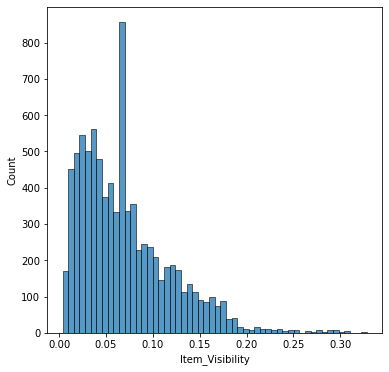

In [24]:
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data["Item_Visibility"])
plt.show()

In [25]:
big_mart_data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [26]:
big_mart_data.replace({"Item_Fat_Content":{"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"}},inplace=True)

In [27]:
big_mart_data["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Creating new features in data set

In [28]:
big_mart_data["New_Item_Type"]=big_mart_data["Item_Identifier"].apply(lambda x:x[:2])
big_mart_data["New_Item_Type"]=big_mart_data["New_Item_Type"].map({"FD":"Food","NC":"Non-Consumable","DR":"Drinks"})
big_mart_data.drop("Item_Identifier",axis=1,inplace=True)
print(big_mart_data["New_Item_Type"])

0                 Food
1               Drinks
2                 Food
3                 Food
4       Non-Consumable
             ...      
8518              Food
8519              Food
8520    Non-Consumable
8521              Food
8522            Drinks
Name: New_Item_Type, Length: 8523, dtype: object


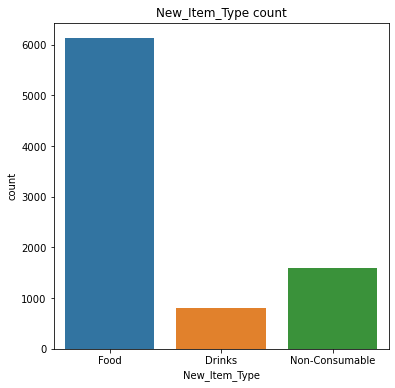

In [29]:
#New_Item_Typet column
plt.figure(figsize=(6,6))
sns.countplot(x="New_Item_Type",data=big_mart_data)
plt.title("New_Item_Type count")
plt.show()

In [30]:
big_mart_data.loc[big_mart_data["New_Item_Type"]=="Non-Consumable","Item_Fat_Content"]="Non-Edible"
big_mart_data["Item_Fat_Content"].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

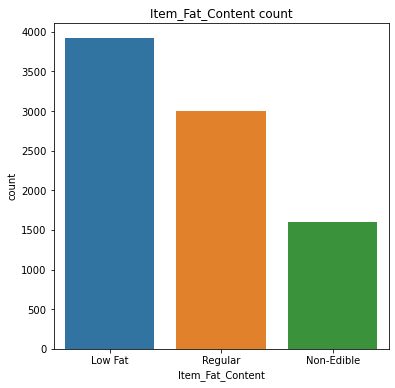

In [31]:
#Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content",data=big_mart_data)
plt.title("Item_Fat_Content count")
plt.show()

In [32]:
big_mart_data["Outlet_Opened_Year"]= 2013-big_mart_data["Outlet_Establishment_Year"] 
big_mart_data.drop("Outlet_Establishment_Year",axis=1,inplace=True)
print(big_mart_data["Outlet_Opened_Year"])

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Opened_Year, Length: 8523, dtype: int64


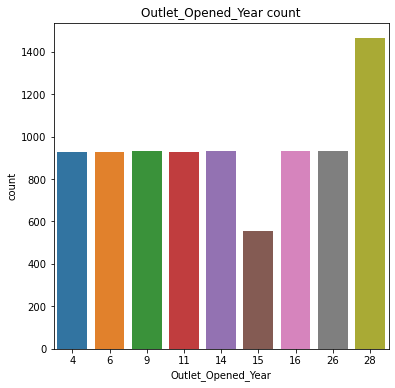

In [33]:
#Outlet_Opened_Year column
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Opened_Year",data=big_mart_data)
plt.title("Outlet_Opened_Year count")
plt.show()

In [34]:
big_mart_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Opened_Year
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,Food,15
4,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


# Co-relation Matrix

<AxesSubplot:>

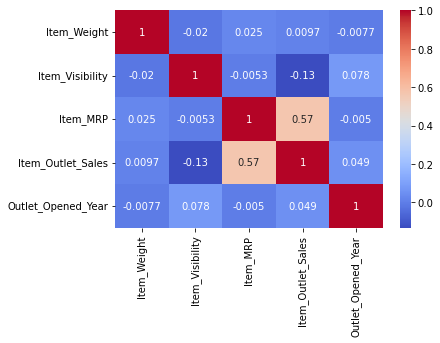

In [35]:
corr = big_mart_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [37]:
category = ["Item_Fat_Content","Outlet_Identifier","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type","New_Item_Type"]
for col in category:
    big_mart_data[col] = encoder.fit_transform(big_mart_data[col])

In [38]:
big_mart_data.head(4)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Opened_Year
0,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380,1,14
1,5.92,2,0.019278,14,48.2692,3,1,2,2,443.4228,0,4
2,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700,1,14
3,19.20,2,0.066132,6,182.0950,0,2,2,0,732.3800,1,15


# Separating features from target variable

In [39]:
X=big_mart_data.drop(["Item_Outlet_Sales","Outlet_Identifier"],axis=1)
y=big_mart_data["Item_Outlet_Sales"]

In [40]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Opened_Year
0,9.300,0,0.016047,4,249.8092,1,0,1,1,14
1,5.920,2,0.019278,14,48.2692,1,2,2,0,4
2,17.500,0,0.016760,10,141.6180,1,0,1,1,14
3,19.200,2,0.066132,6,182.0950,2,2,0,1,15
4,8.930,1,0.066132,9,53.8614,0,2,1,2,26
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,2,1,1,26
8519,8.380,2,0.046982,0,108.1570,2,1,1,1,11
8520,10.600,1,0.035186,8,85.1224,2,1,1,2,9
8521,7.210,2,0.145221,13,103.1332,1,2,2,1,4


In [41]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# splitting the data into training data and testing data

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

# Training and Testing of Model

From RANDOM FOREST

In [43]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import r2_score

model_rf = RandomForestRegressor()

#Printing all the parameters of Random Forest
print(RandomForestRegressor)

#Model fitting
model_rf.fit(X_train,y_train)

#to get predicted value
y_predict = model_rf.predict(X_test)


print("R2_score of RANDOM FOREST is : ",r2_score(y_test,y_predict))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
R2_score of RANDOM FOREST is :  0.5446669186598267


From XGBoost

In [44]:
import xgboost
from xgboost import XGBRegressor

RegModel=XGBRegressor(max_depth=4, learning_rate=0.09, n_estimators=2000, objective='reg:linear', booster='gbtree')
 
train_x=X_train.values
test_x=X_test.values
    
#Printing all the parameters of XGBoost
print(RegModel)

#Model fitting
XGB=RegModel.fit(train_x,y_train)

#to get predicted value
y_prediction=XGB.predict(test_x)

print("R2_score of XGBoost is : ",r2_score(y_train, XGB.predict(X_train)))

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.09, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', predictor=None,
             random_state=None, reg_alpha=None, ...)
[08:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
R2_score of XGBoost is :  0.9031706727176396


From MLPRegressor

In [45]:
from sklearn.neural_network import MLPRegressor

model_mlp = MLPRegressor(hidden_layer_sizes=(300,300,300),batch_size=30,learning_rate_init=0.001,max_iter=200)

#Printing all the parameters of XGBoost
print(model_mlp)

#Model fitting
model_mlp.fit(X_train,y_train)

#to get predicted value
y_predi = model_mlp.predict(X_test)

print("R2_score of MLPRegressor is : ",r2_score(y_train,model_mlp.predict(X_train)))

MLPRegressor(batch_size=30, hidden_layer_sizes=(300, 300, 300))
R2_score of MLPRegressor is :  0.5854226770126902


# Graphs OF ACTUAL vs PREDICTED Values of all the model

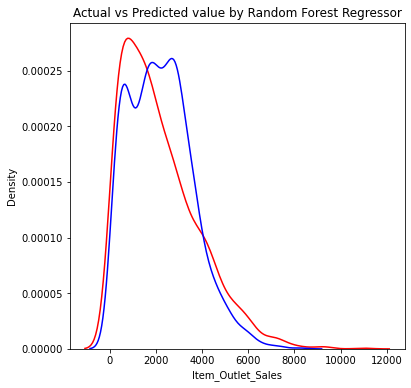

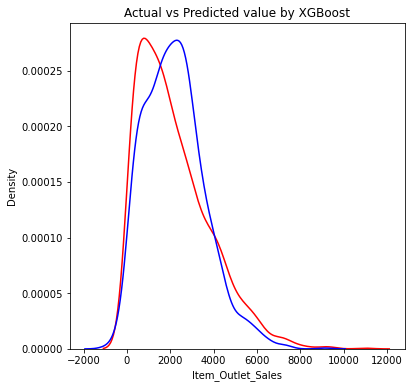

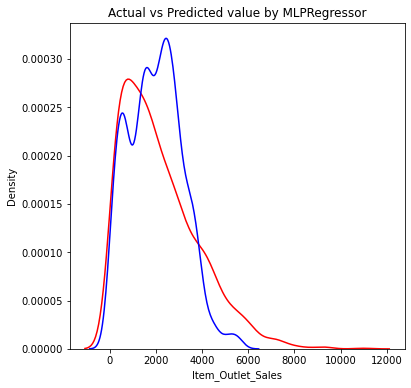

In [46]:

plt.figure(figsize=(6,6))
a=sns.kdeplot(y_test,color='r',label="Actual value")
sns.kdeplot(y_predict,color='b',label="fitted value",ax=a)
plt.title("Actual vs Predicted value by Random Forest Regressor")
plt.show()


plt.figure(figsize=(6,6))
b=sns.kdeplot(y_test,color='r',label="Actual value")
sns.kdeplot(y_prediction,color='b',label="fitted value",ax=b)
plt.title("Actual vs Predicted value by XGBoost")
plt.show()


plt.figure(figsize=(6,6))
c=sns.kdeplot(y_test,color='r',label="Actual value")
sns.kdeplot(y_predi,color='b',label="fitted value",ax=c)
plt.title("Actual vs Predicted value by MLPRegressor")
plt.show()

From graph we can say that XGBoost model works well

# Result

Since model trained from XGBoost gives higher accuracy . We will take XGBoost model

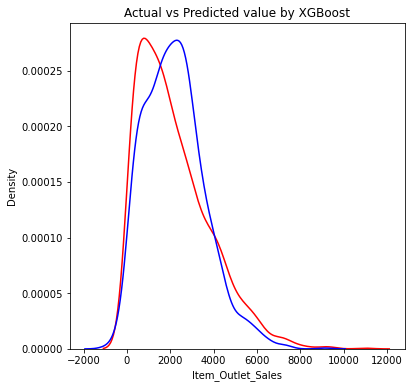

In [47]:
plt.figure(figsize=(6,6))
b=sns.kdeplot(y_test,color='r',label="Actual value")
sns.kdeplot(y_prediction,color='b',label="fitted value",ax=b)
plt.title("Actual vs Predicted value by XGBoost")
plt.show()

Predicting result by giving input

In [48]:
d=[[9.3,0,0.01,4,249,1,0,1,1,14]]
XGB.predict(d)

array([4751.972], dtype=float32)